In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('database.csv',low_memory=False)

In [2]:
# Фильтрация данных для случаев, когда убийцей была женщина, а жертва мужчина
female_kills_male = data[(data['Perpetrator Sex'] == 'Female') & (data['Victim Sex'] == 'Male')]

# Фильтрация данных для случаев, когда убийцей был мужчина, а жертва женщина
male_kills_female = data[(data['Perpetrator Sex'] == 'Male') & (data['Victim Sex'] == 'Female')]

# Группировка данных по годам и подсчет количества случаев для каждой ситуации
female_kills_male_by_year = female_kills_male.groupby('Year').size().reset_index(name='Female Kills Male')
male_kills_female_by_year = male_kills_female.groupby('Year').size().reset_index(name='Male Kills Female')

# Объединение данных
merged_data = pd.merge(female_kills_male_by_year, male_kills_female_by_year, on='Year', how='outer').fillna(0)


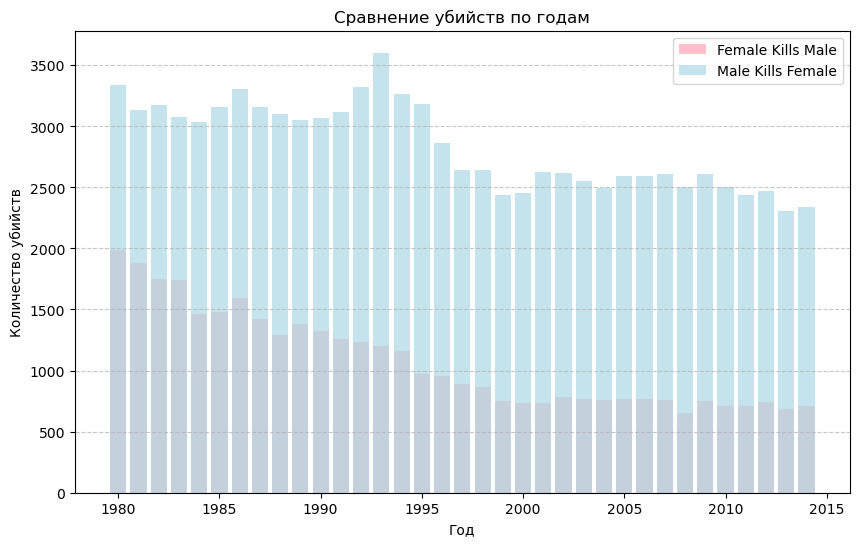

In [3]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Year'], merged_data['Female Kills Male'], color='pink', label='Female Kills Male')
plt.bar(merged_data['Year'], merged_data['Male Kills Female'], color='lightblue', label='Male Kills Female', alpha=0.7)
plt.title('Сравнение убийств по годам')
plt.xlabel('Год')
plt.ylabel('Количество убийств')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Список категорий убийств
categories = [
    ("Мужчина черный убивает мужчину черного", "Male", "Black", "Male", "Black"),
    ("Мужчина черный убивает мужчину белого" , "Male", "Black", "Male", "White"),
    ("Мужчина черный убивает женщину черного", "Male", "Black", "Female", "Black"),
    ("Мужчина черный убивает женщину белого" , "Male", "Black", "Female", "White"),
    ("Мужчина белый убивает мужчину черного" , "Male", "White", "Male", "Black"),
    ("Мужчина белый убивает мужчину белого"  , "Male", "White", "Male", "White"),
    ("Мужчина белый убивает женщину черного" , "Male", "White", "Female", "Black"),
    ("Мужчина белый убивает женщину белого"  , "Male", "White", "Female", "White"),
    ("Женщина черная убивает мужчину черного", "Female", "Black", "Male", "Black"),
    ("Женщина черная убивает мужчину белого" , "Female", "Black", "Male", "White"),
    ("Женщина черная убивает женщину черного", "Female", "Black", "Female", "Black"),
    ("Женщина черная убивает женщину белого" , "Female", "Black", "Female", "White"),
    ("Женщина белая убивает мужчину черного" , "Female", "White", "Male", "Black"),
    ("Женщина белая убивает мужчину белого"  , "Female", "White", "Male", "White"),
    ("Женщина белая убивает женщину черного" , "Female", "White", "Female", "Black"),
    ("Женщина белая убивает женщину белого"  , "Female", "White", "Female", "White")
]


# Подсчет убийств для каждой категории
category_counts = []

for category in categories:
    category_name, perpetrator_sex, perpetrator_race, victim_sex, victim_race = category
    filtered_data = data[(data['Perpetrator Sex'] == perpetrator_sex) & 
                         (data['Perpetrator Race'] == perpetrator_race) & 
                         (data['Victim Sex'] == victim_sex) & 
                         (data['Victim Race'] == victim_race)]
    category_count = len(filtered_data)
    category_counts.append((category_name, category_count))
    
# Сортировка категорий по числу убийств
category_counts.sort(key=lambda x: x[1], reverse=True)
    
# Вывод результатов
for category, count in category_counts:
    print(f"{category}: {count}")

Мужчина черный убивает мужчину черного: 125088
Мужчина белый убивает мужчину белого: 122388
Мужчина белый убивает женщину белого: 54053
Мужчина черный убивает женщину черного: 31012
Мужчина черный убивает мужчину белого: 23629
Женщина черная убивает мужчину черного: 18369
Женщина белая убивает мужчину белого: 15615
Мужчина белый убивает мужчину черного: 13979
Мужчина черный убивает женщину белого: 7507
Женщина белая убивает женщину белого: 5046
Женщина черная убивает женщину черного: 4674
Мужчина белый убивает женщину черного: 1658
Женщина белая убивает мужчину черного: 1137
Женщина черная убивает мужчину белого: 1097
Женщина черная убивает женщину белого: 366
Женщина белая убивает женщину черного: 221


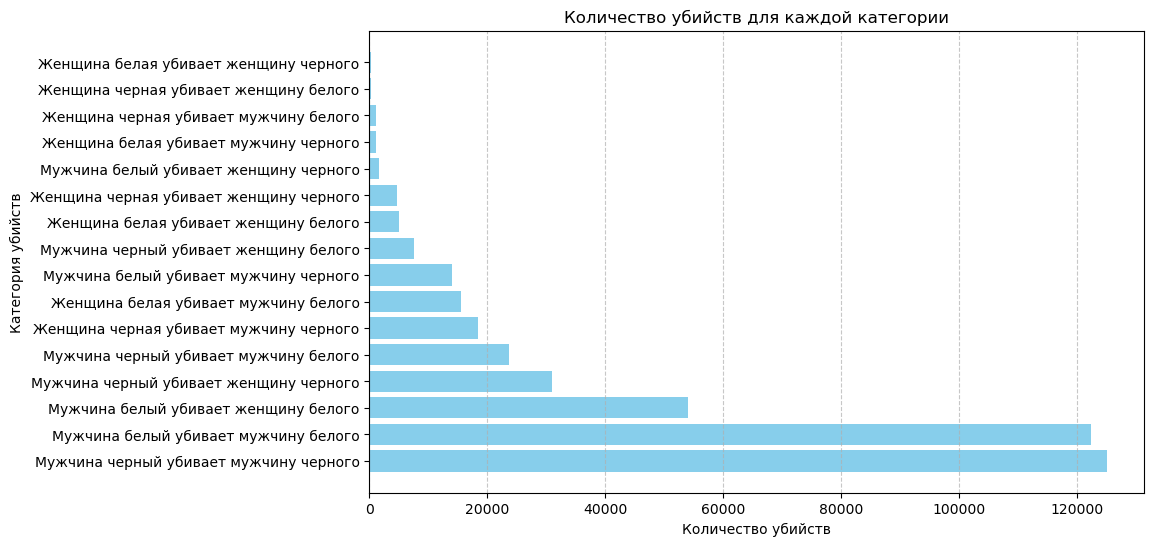

In [6]:
# Сортировка категорий по числу убийств
category_counts.sort(key=lambda x: x[1], reverse=True)

# Создание гистограммы
plt.figure(figsize=(10, 6))
categories_names = [x[0] for x in category_counts]
categories_counts = [x[1] for x in category_counts]
plt.barh(categories_names, categories_counts, color='skyblue')
plt.xlabel('Количество убийств')
plt.ylabel('Категория убийств')
plt.title('Количество убийств для каждой категории')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()